In [3]:
# Import the data loader.
import carla_json_loader as cjl
import os
import json
import attrdict
import numpy as np

In [4]:
directory = '/home/fireofearth/code/robotics/precog_carla_dataset/send_to_nick'
fn1 = os.path.join(directory, 'frame00000290.json')
fn2 = os.path.join(directory, 'frame00001680.json')

fn3 = '/home/fireofearth/code/robotics/precog_carla_dataset/mock/map/ep/agent/ma_datum_00000000.json'
fn4 = '/media/external/data/precog_generate/datasets/20210209/Town03/ep000/agent471/frame00000420.json'

In [5]:
def load_raw_json(json_fn):
    assert(os.path.isfile(json_fn))
    with open(json_fn, 'r') as f:
        return json.load(f)

def load_json(json_fn):
    def valid_type(v):
        return isinstance(v, (dict, int, float, str,))

    def from_json_dict(json_datum):
        """Postprocess the json datum to ndarray-ify things

        :param json_datum: dict of the loaded json datum.
        :returns: dict of the postprocessed json datum.
        """
        pp = attrdict.AttrDict()
        for k, v in json_datum.items():
            if isinstance(v, list):
                pp[k] = np.asarray(v)
            elif valid_type(v):
                pp[k] = v
            else:
                raise ValueError("Unrecognized type")
        return pp

    assert(os.path.isfile(json_fn))
    with open(json_fn, 'r') as f:
        json_datum = json.load(f)
        return from_json_dict(json_datum)

In [6]:
datum = load_raw_json(fn1)
datum.keys()
# dict_keys(['player_past', 'player_future', 'agent_pasts', 'agent_futures',
# 'overhead_features', 'player_transform', 'agent_transforms', 'lidar_params',
# 'episode', 'frame', 'agent_yaws', 'player_yaw'])

dict_keys(['episode', 'frame', 'lidar_params', 'player_past', 'agent_pasts', 'overhead_features', 'player_future', 'agent_futures', 'player_yaw', 'agent_yaws', 'labels'])

In [7]:
datum = load_json(fn1)
print(datum.lidar_params)
datum = load_json(fn2)
print(datum.lidar_params)

AttrDict({'val_obstacle': 1.0, 'hist_max_per_pixel': 25, 'pixels_per_meter': 2, 'meters_max': 50})
AttrDict({'val_obstacle': 1.0, 'hist_max_per_pixel': 25, 'pixels_per_meter': 2, 'meters_max': 50})


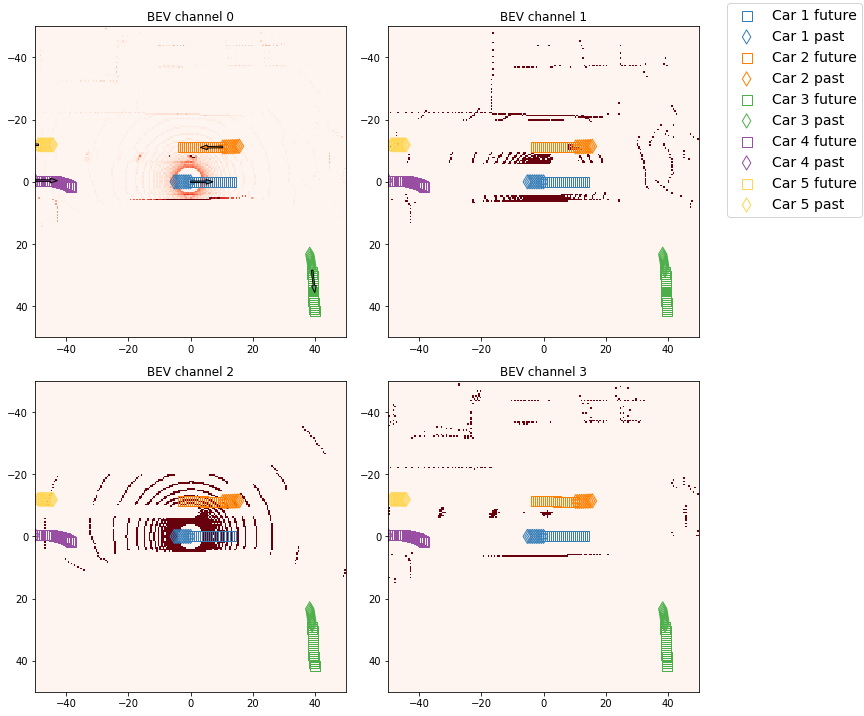

In [10]:
# Plot all agent pasts and futures on each channel of the BEV, setting the view window to be 55*2 meters wide
# help(cjl.plot_datum)
datum = load_json(fn1)
fig = cjl.plot_datum(datum, meters_max=50)

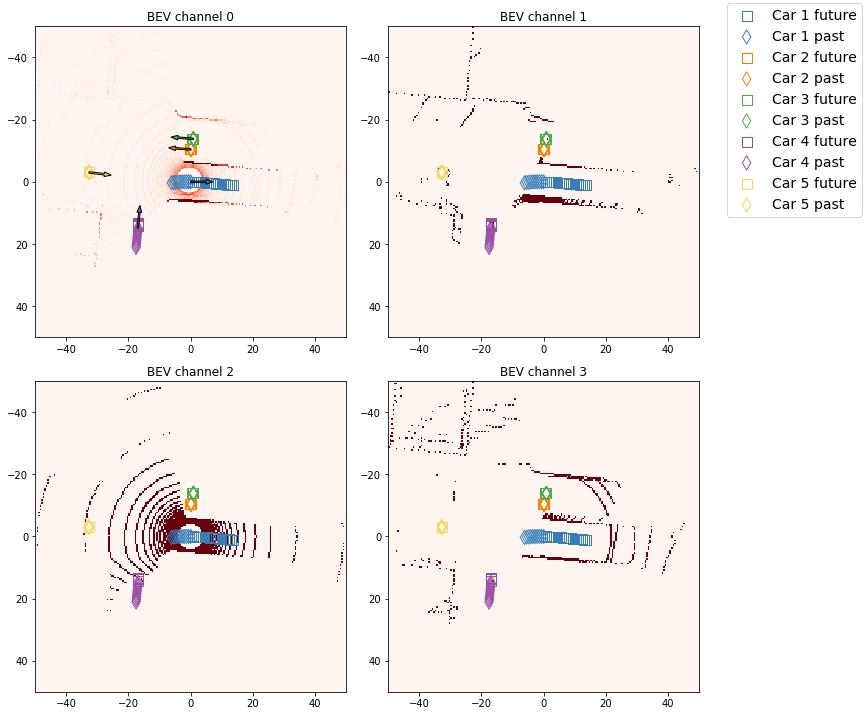

In [11]:
datum = load_json(fn2)
fig = cjl.plot_datum(datum, meters_max=50)